# 0. Download Dataset

In [1]:
import pandas as pd

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"braveseokyung","key":"ef9e9f7c74e2a8337292d50296609c45"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

#Warning: Your Kaggle API key is readable by other users on this system! To fix this, you can run 'chmod 600 /root/.kaggle/kaggle.json'
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 17.4MB/s]


In [5]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# 1.EDA

## 1.1. 변수

* target variable (categorical)   
```survival```	Survival	0 = No, 1 = Yes

* explanatory variables   
```passengerId```   
```pclass```	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd   
```sex```	Sex	
```Age```	Age in years	
```sibsp```	# of siblings / spouses aboard the Titanic	
```parch```	# of parents / children aboard the Titanic	
```ticket```	Ticket number	
```fare```	Passenger fare	
```cabin```	Cabin number	
```embarked```	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton





In [6]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [7]:
data_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [8]:
data_train.info() # 결측치 'Age', 'Cabin', 'Embarked'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
data_train[data_train.duplicated()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [11]:
data_train[data_train.duplicated(['Name','Sex','Age'])] # 중복 데이터 없음

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

## 1.2. 각 변수 EDA

In [12]:
import seaborn as sns #https://www.kaggle.com/code/fourbic/visualizing-the-titanic-data-with-seaborn
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [13]:
data_train.columns.unique() # 전체 column 이름 보기

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

0    549
1    342
Name: Survived, dtype: int64


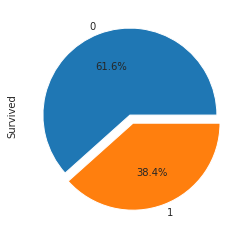

In [14]:
# 'Survived' : categorical
print(data_train['Survived'].value_counts())
data_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


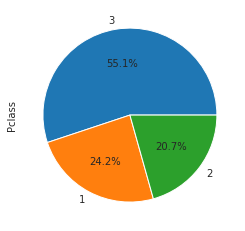

In [15]:
# Pclass : categorical
print(data_train['Pclass'].value_counts())
data_train['Pclass'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

male      577
female    314
Name: Sex, dtype: int64


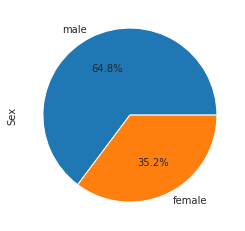

In [16]:
# Sex : categorical
print(data_train['Sex'].value_counts())
data_train['Sex'].value_counts().plot.pie(autopct='%.1f%%')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


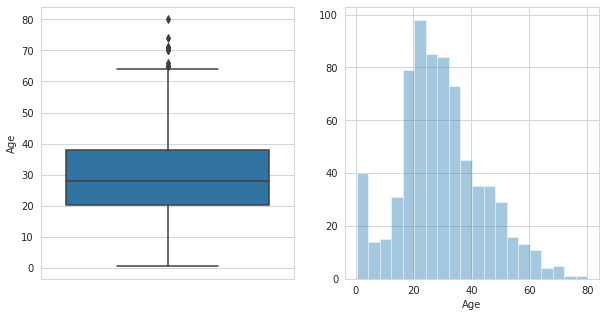

In [17]:
# Age : numeric
fig, ax= plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(y='Age',data=data_train,ax=ax[0])
sns.distplot(data_train['Age'],ax=ax[1],kde=False)
fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


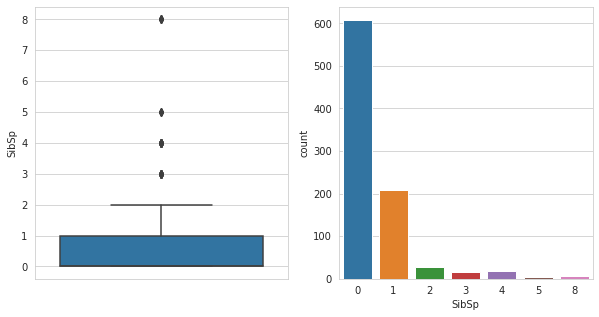

In [18]:
# 'Sibsp' : numeric
fig,ax=plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(y=data_train['SibSp'],ax=ax[0])
sns.countplot(data_train['SibSp'],ax=ax[1]) # 변수가 항상 정수값이므로 distplot 말고 countplot
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


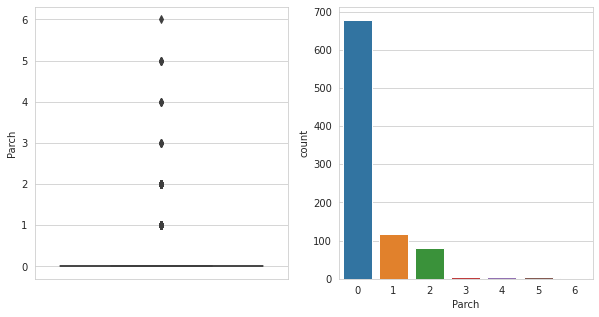

In [19]:
# 'Parch' : numeric
fig,ax=plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(y=data_train['Parch'],ax=ax[0])
sns.countplot(data_train['Parch'],ax=ax[1])
plt.show()

In [20]:
# 'Ticket' : categorical
data_train['Ticket'].nunique() # 사실상 고유값

681

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


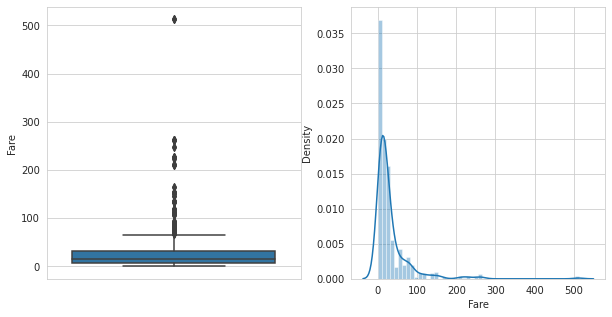

In [21]:
# 'Fare' : numeric
fig,ax=plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot(y=data_train['Fare'],ax=ax[0])
sns.distplot(data_train['Fare'],ax=ax[1]) # Skewed , 이상치
plt.show()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


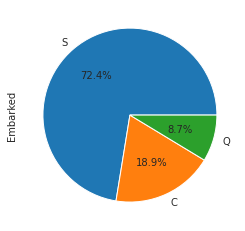

In [22]:
# 'Embarked' : categorical
print(data_train['Embarked'].value_counts())
data_train['Embarked'].value_counts().plot.pie(autopct='%.1f%%')

## 1.3. 변수간 EDA
* categorical : ['Survived' , 'Pclass' ,  'Sex' , 'Embarked'] - target variable 'Survived'를 이용해도 되나?
* numberic : ['Age', 'SibSp', 'Parch' , 'Fare']

Text(0.5, 1.0, 'heatmap')

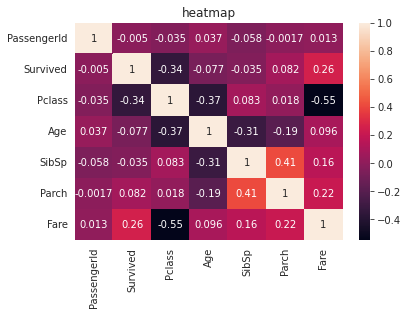

In [23]:
# heatmap
sns.heatmap(data_train.corr(),annot=True) # 변수간 correlation 값이 낮음
plt.title('heatmap')

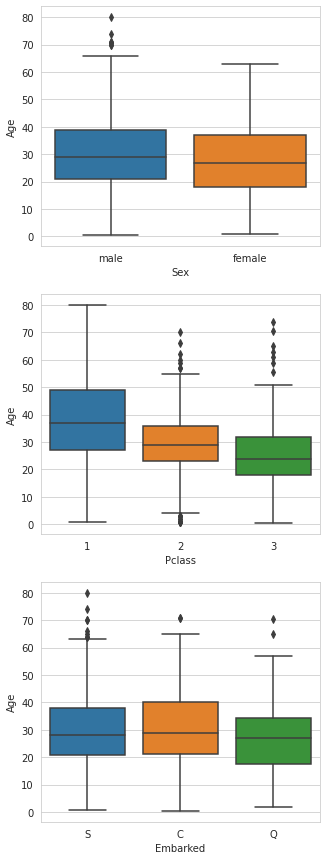

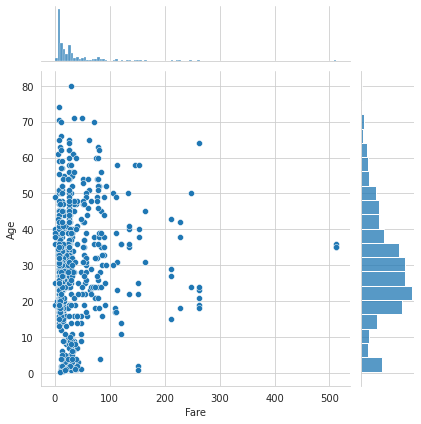

In [24]:
# 'Age' 가 y축

fig,ax=plt.subplots(nrows=3,figsize=(5,15))
# 'Age' and 'Sex'
sns.boxplot(x='Sex',y='Age',data=data_train,ax=ax[0])
# 'Age' and 'Pclass'
sns.boxplot(x='Pclass',y='Age',data=data_train,ax=ax[1]) # 좌석등급이 좋을수록 연령대가 올라가는 경향이 있음
# 'Age' and 'Embarked'
sns.boxplot(x='Embarked',y='Age',data=data_train,ax=ax[2])
# 'Age' and 'Fare'
sns.jointplot(x='Fare',y='Age',data=data_train)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


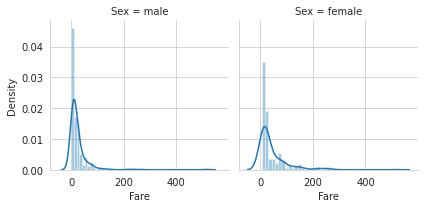

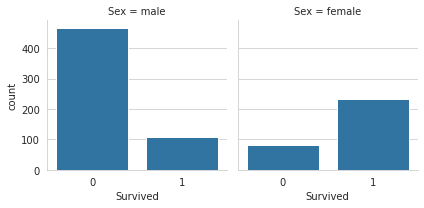

In [25]:
# 'sex' and 'Fare'
fig_sex_fare=sns.FacetGrid(data=data_train,col='Sex')
fig_sex_fare.map(sns.distplot,'Fare')
# 'sex' and 'Survived'
fig_sex_survived=sns.FacetGrid(data=data_train, col='Sex')
fig_sex_survived.map(sns.countplot,'Survived')
plt.show()

# 2. Data Preprocssing

고려사항
* 불필요한 columns : ['PassengerId' , 'Name' , 'Ticket' , 'Cabin']
* 'Age' 결측치 처리
* 'SibSp' , 'Parch' 처럼 정수 numeric인 경우, categorical로 처리해야 할까? 
* 'SibSp' , 'Parch'가 의미상 동일하다고 판단 -> 합쳐줌
* categorical 변수 ['Pclass' , 'Sex' , 'Embarked'] 처리 
* 'Fare' 가 한쪽으로 치우쳐 있음 -> 표준화
* 모든 numeric 변수의 range를 맞춰줘야 할까?
* 변수간 EDA의 의미를 correlation 빼고는 잘 모르겠음

In [256]:
# dataset copy
train=data_train.copy()

## 2.1. 불필요한 column 제거

* 'PassengerId' : 단순 인덱스
* 'Name' : 고유값
* 'Ticket' : 고유값 (891개 중 681개가 unique)
* 'Cabin' : 결측치가(전체 데이터의 약 80%) 너무 많아서 제거하는 게 낫다고 판단

In [257]:
train=train.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [258]:
train_categorical=train[['Pclass' , 'Sex' , 'Embarked']].copy()
train_numeric=train[['Age', 'SibSp', 'Parch', 'Fare']].copy()

## 2.2. categorical 변수 ['Pclass' , 'Sex' , 'Embarked'] 처리

In [259]:
# 'Sex','Embarked' 처리:get_dummies
train_categorical=pd.get_dummies(train_categorical) # 'Pclass' 는 dtype int 이므로 get_dummies로 처리되지 않음 

In [260]:
# 'Pclass' 처리 :OneHotEncoding https://lucian-blog.tistory.com/49
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()

Pclass_onehot=encoder.fit_transform(train_categorical[['Pclass']]) # 인지로 2차원 배열을 받음

Pclass_onehot=pd.DataFrame(Pclass_onehot.toarray())
Pclass_onehot.columns='Pclass_'+encoder.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [261]:
#데이터 병합
train_categorical=pd.concat([train_categorical,Pclass_onehot],axis=1)
train_categorical=train_categorical.drop(columns='Pclass')

## 2.3. 'SibSp'와 'Parch'를 합쳐서 하나의 변수 'Family'로 변환

In [262]:
train_numeric['Family']=train_numeric['SibSp']+train_numeric['Parch']
train_numeric=train_numeric.drop(columns=['SibSp','Parch'])
train_numeric['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [249]:
# categorical 로 변화하면 성능이 떨어짐

# encoder_family=OneHotEncoder()
# family_onehot=encoder_family.fit_transform(train_numeric[['Family']])

# family_onehot=pd.DataFrame(family_onehot.toarray())
# family_onehot.columns='Family_'+encoder_family.get_feature_names()

# train_categorical=pd.concat([train_categorical,family_onehot],axis=1)
# train_numeric=train_numeric.drop(columns='Family')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 2.4. 'Fare' skewedness 해결 -> 불가
로그 변환->infinity 문제가 생김  
inf,-inf를 nan으로 replace-> test data는 nan으로 replace해서 drop할 수 없음

In [250]:
# import numpy as np
# train_numeric['Fare']=np.log(train_numeric['Fare'])
# train_numeric['Fare'] = train_numeric['Fare'].replace([np.inf, -np.inf], np.nan)

# #X_train['Fare']=X_train['Fare'].dropna()

## 2.5. numeric 변수 정규화 -> 정규화 하지 않는 것이 성능이 더 좋음

In [251]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler.fit(train_numeric)
# train_numeric_scaled=scaler.transform(train_numeric)
# train_numeric=pd.DataFrame(data=train_numeric_scaled,columns=train_numeric.columns)

# train_numeric

## 2.6. 'Age' 결측치 채우기 :KNN

In [263]:
# categorical, numeric 변수 병합
X_train=pd.concat([train_categorical,train_numeric],axis=1)
X_train

Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  Pclass_x0_1  \
0             0         1           0           0           1          0.0   
1             1         0           1           0           0          1.0   
2             1         0           0           0           1          0.0   
3             1         0           0           0           1          1.0   
4             0         1           0           0           1          0.0   
..          ...       ...         ...         ...         ...          ...   
886           0         1           0           0           1          0.0   
887           1         0           0           0           1          1.0   
888           1         0           0           0           1          0.0   
889           0         1           1           0           0          1.0   
890           0         1           0           1           0          0.0   

     Pclass_x0_2  Pclass_x0_3   Age     Fare  Family  
0            0.0          1.0  22.0   7.2500       1  
1            0.0          0.0  38.0  71.2833       1  
2            0.0          1.0  26.0   7.9250       0  
3            0.0          0.0  35.0  53.1000       1  
4            0.0          1.0  35.0   8.0500       0  
..           ...          ...   ...      ...     ...  
886          1.0          0.0  27.0  13.0000       0  
887          0.0          0.0  19.0  30.0000       0  
888          0.0          1.0   NaN  23.4500       3  
889          0.0          0.0  26.0  30.0000       0  
890          0.0          1.0  32.0   7.7500       0  

[891 rows x 11 columns]

In [264]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)

filled_train=imputer.fit_transform(X_train)
X_train=pd.DataFrame(filled_train,columns=X_train.columns)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex_female   891 non-null    float64
 1   Sex_male     891 non-null    float64
 2   Embarked_C   891 non-null    float64
 3   Embarked_Q   891 non-null    float64
 4   Embarked_S   891 non-null    float64
 5   Pclass_x0_1  891 non-null    float64
 6   Pclass_x0_2  891 non-null    float64
 7   Pclass_x0_3  891 non-null    float64
 8   Age          891 non-null    float64
 9   Fare         891 non-null    float64
 10  Family       891 non-null    float64
dtypes: float64(11)
memory usage: 76.7 KB


# 3. Train and Test

## 3.1. Test 데이터도 똑같이 전처리

In [265]:
test=data_test.copy()
test=test.drop(columns=['PassengerId','Name','Ticket','Cabin'])
test_categorical=test[['Pclass' , 'Sex' , 'Embarked']].copy()
test_numeric=test[['Age', 'SibSp', 'Parch', 'Fare']].copy()

test_categorical=pd.get_dummies(test_categorical)

encoder=OneHotEncoder()

Pclass_onehot=encoder.fit_transform(test_categorical[['Pclass']]) # 인지로 2차원 배열을 받음

Pclass_onehot=pd.DataFrame(Pclass_onehot.toarray())
Pclass_onehot.columns='Pclass_'+encoder.get_feature_names()
test_categorical=pd.concat([test_categorical,Pclass_onehot],axis=1)
test_categorical=test_categorical.drop(columns='Pclass')


test_numeric['Family']=test_numeric['SibSp']+test_numeric['Parch']
test_numeric=test_numeric.drop(columns=['SibSp','Parch'])

# encoder_family=OneHotEncoder()
# family_onehot=encoder_family.fit_transform(test_numeric[['Family']])

# family_onehot=pd.DataFrame(family_onehot.toarray())
# family_onehot.columns='Family_'+encoder_family.get_feature_names()

# test_categorical=pd.concat([test_categorical,family_onehot],axis=1)
# test_numeric=test_numeric.drop(columns='Family')


# scaler_test=StandardScaler()
# scaler_test.fit(test_numeric)
# test_numeric_scaled=scaler.transform(test_numeric)
# test_numeric=pd.DataFrame(data=test_numeric_scaled,columns=test_numeric.columns)


X_test=pd.concat([test_categorical,test_numeric],axis=1)

imputer=KNNImputer(n_neighbors=5)

filled_test=imputer.fit_transform(X_test)
X_test=pd.DataFrame(filled_test,columns=X_test.columns)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex_female   418 non-null    float64
 1   Sex_male     418 non-null    float64
 2   Embarked_C   418 non-null    float64
 3   Embarked_Q   418 non-null    float64
 4   Embarked_S   418 non-null    float64
 5   Pclass_x0_1  418 non-null    float64
 6   Pclass_x0_2  418 non-null    float64
 7   Pclass_x0_3  418 non-null    float64
 8   Age          418 non-null    float64
 9   Fare         418 non-null    float64
 10  Family       418 non-null    float64
dtypes: float64(11)
memory usage: 36.0 KB


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 3.2. Train/Test
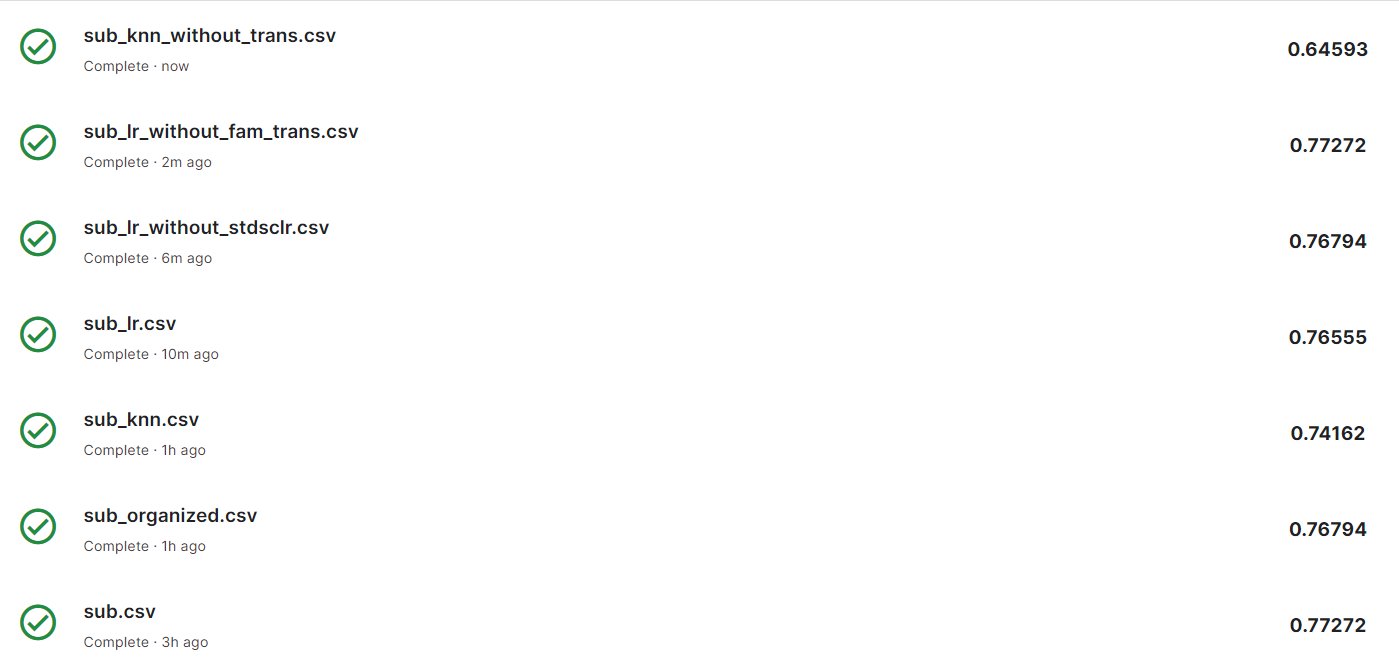



In [266]:
# Logistic Regression
# best public score: 0.77272 ( 정규화 x )
# worst public score: 0.7655 (정규화, family 변수 categorical로 변환)

from sklearn.linear_model import LogisticRegression
y_train=train['Survived']

model_lr=LogisticRegression(max_iter=10000)
model_lr.fit(X_train,y_train)

y_pred=model_lr.predict(X_test)

submission=pd.DataFrame({'PassengerId':data_test.PassengerId,'Survived':y_pred}).set_index('PassengerId')
submission.to_csv('sub_lr_without_fam_trans.csv')
submission['Survived'].value_counts()

0    265
1    153
Name: Survived, dtype: int64

In [267]:
#KNN 성능
#best public score 0.74162 (정규화)
#worst public score 0.64594 (정규화 x)

# from sklearn.neighbors import KNeighborsClassifier

# model_knn=KNeighborsClassifier(n_neighbors=5)
# model_knn.fit(X_train,y_train)

# y_pred_knn=model_knn.predict(X_test)

# submission_knn=pd.DataFrame({'PassengerId':data_test.PassengerId,'Survived':y_pred_knn}).set_index('PassengerId')
# submission_knn.to_csv('sub_knn_without_trans.csv')
# submission_knn['Survived'].value_counts()

0    268
1    150
Name: Survived, dtype: int64